In [1]:
from algorithms import *
from algorithms.MlpV2 import *
data = Data()
data.print_shapes()
X_train = data.train_data
y_train = data.train_label

(45000, 128)
(45000, 10)
(5000, 128)
(5000, 10)
(10000, 128)
(10000, 10)


In [2]:
X_test = data.test_data
y_test = data.test_label

In [3]:
batch_size = [32, 64, 128, 256]
loss = []
train_acc = []
test_acc = []

In [4]:
for batch in batch_size:
    nn = MlpV2(learning_rate=0.003, batch_size= batch)
    nn.set_momentum(0.9)
    nn.set_batchNormalizer()
    nn.add_layer(128,512,"relu",1)
    nn.add_layer(512,256,"relu",1)
    nn.add_layer(256,128,"relu",1)
    nn.add_layer(128,64,"relu",1)
    nn.add_layer(64,10,"softmax",1)
    
    train_loss = nn.fit(X_train, y_train, epochs=50)
    loss.append(train_loss)
    
    acc = nn.evaluate(X_train, y_train)
    train_acc.append(acc)
    
    t_acc = nn.evaluate(X_test, y_test)
    test_acc.append(t_acc)

Epoch: 1  Training Loss: 1.987310627475628  Time (sec): 7.200211763381958
Epoch: 2  Training Loss: 1.7390984211206522  Time (sec): 7.099810361862183
Epoch: 3  Training Loss: 1.662148812100062  Time (sec): 6.997423887252808
Epoch: 4  Training Loss: 1.6134954518545015  Time (sec): 6.939979553222656
Epoch: 5  Training Loss: 1.5872579750079787  Time (sec): 7.096311330795288
Epoch: 6  Training Loss: 1.6215545125240982  Time (sec): 6.997931241989136
Epoch: 7  Training Loss: 1.995063745236686  Time (sec): 7.0806660652160645
Epoch: 8  Training Loss: 1.951697232514006  Time (sec): 6.965386629104614
Epoch: 9  Training Loss: 1.9404477560678186  Time (sec): 7.079723834991455
Epoch: 10  Training Loss: 1.978170548715002  Time (sec): 6.979020357131958
Epoch: 11  Training Loss: 2.05067072360733  Time (sec): 6.9109437465667725
Epoch: 12  Training Loss: 2.116620296772681  Time (sec): 6.870788335800171
Epoch: 13  Training Loss: 2.1494696189212665  Time (sec): 6.9524290561676025
Epoch: 14  Training Loss: 

Epoch: 10  Training Loss: 1.5965356042027845  Time (sec): 3.947227954864502
Epoch: 11  Training Loss: 1.5785544818618453  Time (sec): 3.91947865486145
Epoch: 12  Training Loss: 1.5622135312849965  Time (sec): 3.938572406768799
Epoch: 13  Training Loss: 1.5452909014864218  Time (sec): 3.9781317710876465
Epoch: 14  Training Loss: 1.5299173562919348  Time (sec): 3.9565253257751465
Epoch: 15  Training Loss: 1.516254345492237  Time (sec): 3.862661123275757
Epoch: 16  Training Loss: 1.5025346772579151  Time (sec): 3.9782626628875732
Epoch: 17  Training Loss: 1.488679063180898  Time (sec): 3.948585033416748
Epoch: 18  Training Loss: 1.4758307868114013  Time (sec): 3.987830877304077
Epoch: 19  Training Loss: 1.4615865595745603  Time (sec): 3.9725587368011475
Epoch: 20  Training Loss: 1.4510785414547955  Time (sec): 3.980198621749878
Epoch: 21  Training Loss: 1.4364989042702156  Time (sec): 3.948038101196289
Epoch: 22  Training Loss: 1.4245890248640471  Time (sec): 3.9625284671783447
Epoch: 23 

In [5]:
print(train_acc)
print(test_acc)

[0.14208888888888888, 0.3601111111111111, 0.7311777777777778, 0.5871555555555555]
[0.1417, 0.3561, 0.5263, 0.5023]


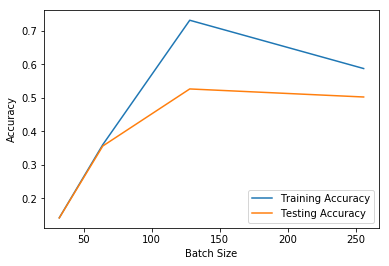

In [26]:
import matplotlib.pyplot as plt
plt.plot(batch_size, train_acc, label='Training Accuracy')
plt.plot(batch_size, test_acc, label='Testing Accuracy')
plt.legend()
plt.xlabel('Batch Size')
plt.ylabel('Accuracy')
plt.savefig('visual_outputs/batch_acc.png')
plt.show()

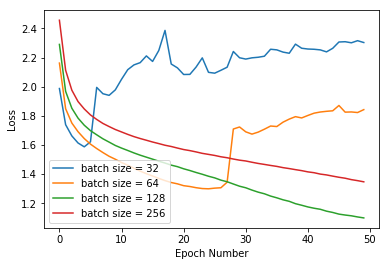

In [27]:
for i in range(len(loss)):
    plt.plot(loss[i], label=f'batch size = {batch_size[i]:.0f}')
plt.legend()
plt.xlabel('Epoch Number')
plt.ylabel('Loss')
plt.savefig('visual_outputs/batch_loss.png')
plt.show()